In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [73]:
custom_colors = ['#784888', '#94b3c4', '#897cac', '#d8bfd4', '#f6e8e7']

sns.set_palette(custom_colors)

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_colors)
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 15

In [74]:
def create_dataframe_features(data, eda_sf, acc_sf, bvp_sf, tem_sf):
    """
        @brief: Generates a dataframe that contains all of the features
        @param: data (dictionary): Data to create the features dataframe from
        @param: eda_sf: Sampling frequency of electrodermal activity
        @param: acc_sf: Sampling frequency of acceleration
        @param: bvp_sf: Sampling frequency of blood volume pulse
        @param: tem_sf: Sampling frequency of body temperature
    """
    columns_EDA = []
    for i in range(0, eda_sf):
        columns_EDA.append("EDA_"+str(i))
    
    columns_TEMP = []
    for i in range(0, tem_sf):
        columns_TEMP.append("TEMP_"+str(i))
        
    columns_ACC1 = []
    for i in range(0, acc_sf):
        columns_ACC1.append("ACC1_"+str(i))
        
    columns_ACC2 = []
    for i in range(0, acc_sf):
        columns_ACC2.append("ACC2_"+str(i))
        
    columns_ACC3 = []
    for i in range(0, acc_sf):
        columns_ACC3.append("ACC3_"+str(i))
        
    columns_BVP = []
    for i in range(0, bvp_sf):
        columns_BVP.append("BVP_"+str(i))
    
    df1 = pd.DataFrame(data['EDA'][:,:,0], columns=columns_EDA)
    df2 = pd.DataFrame(data['TEMP'][:,:,0], columns=columns_TEMP)
    df3 = pd.DataFrame(data['ACC'][:,:,0], columns=columns_ACC1)
    df4 = pd.DataFrame(data['ACC'][:,:,1], columns=columns_ACC2)
    df5 = pd.DataFrame(data['ACC'][:,:,2], columns=columns_ACC3)
    df6 = pd.DataFrame(data['BVP'][:,:,0], columns=columns_BVP)
    features = pd.concat([df1, df2, df3, df4, df5, df6], axis=1)
    return features

In [75]:
def create_dataframe_labels(data):
    """
        @brief: Generates a dataframe that contains the stress labels
        @param: data (dictionary): Data to extract labels from
    """
    labels = pd.DataFrame(data['labels'], columns=["stress"])
    return labels

In [76]:
def create_dataframe_ids(data):
    """
        @brief: Generates a dataframe that contains the participants' ids
        @param: data (dictionary): Data to extract ids from
    """
    ids = pd.DataFrame(data['id'], columns=["id"])
    return ids

In [77]:
modalities = ['ACC', 'BVP', 'EDA', 'TEMP']

#sampling frequencies
ACC_WE = 32
BVP_WE = 64
EDA_WE = 4
TEMP_WE = 4

ACC_AD = 1920
BVP_AD = 3840
EDA_AD = 240
TEMP_AD = 240

In [78]:
#Load data
wesad = pd.read_pickle('../data/wesad/All_ID.pkl')

#Create the dataframe of the features
wesad_features = create_dataframe_features(wesad["data"], EDA_WE, ACC_WE, BVP_WE, TEMP_WE)

#Create the dataframe of the labels
wesad_labels = create_dataframe_labels(wesad)

#Create the dataframe of the ids
wesad_ids = create_dataframe_ids(wesad)

#Concatenate features and labels
wesad_dataset = pd.concat([wesad_ids, wesad_features, wesad_labels], axis = 1)

wesad_dataset

,id,EDA_0,EDA_1,EDA_2,EDA_3,TEMP_0,TEMP_1,TEMP_2,TEMP_3,ACC1_0,...,BVP_55,BVP_56,BVP_57,BVP_58,BVP_59,BVP_60,BVP_61,BVP_62,BVP_63,stress
0,2,5452.450365,5366.846848,5264.122627,5115.746165,10279.722091,10279.722091,10279.722091,10279.722091,126.326243,...,-104.371386,-124.493001,-136.216532,-137.408002,-128.387507,-111.782506,-91.536409,-71.450360,-54.013997,0.0
1,2,5264.122627,5115.746165,5127.156998,5013.021944,10279.722091,10279.722091,10279.722091,10279.722091,90.734562,...,40.556707,36.106477,30.326959,25.850055,23.818332,23.653838,23.849453,23.195923,21.515416,0.0
2,2,5127.156998,5013.021944,5372.556718,5235.591090,10279.722091,10279.722091,10279.722091,10279.722091,-27.904372,...,59.620226,48.839201,38.658357,31.562887,28.882079,28.415272,27.312718,22.711332,13.432982,0.0
3,2,5372.556718,5235.591090,5184.228979,5155.692989,10279.722091,10279.722091,10464.748540,10464.748540,-27.904372,...,-92.892373,-97.182554,-94.319469,-83.391734,-65.897576,-45.375840,-26.334550,-12.494826,-5.474934,0.0
4,2,5184.228979,5155.692989,5115.746165,5081.504758,10464.748540,10464.748540,10464.748540,10464.748540,-39.768266,...,-6.795332,-4.105633,-2.803019,-2.358440,-2.225067,-2.042790,-1.833838,-1.958320,-2.878597,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78761,17,-1141.515991,-1141.515991,-1146.439053,-1141.515991,-11412.917628,-11802.683112,-11802.683112,-11802.683112,57.652528,...,13.827887,13.207938,12.701858,12.233733,11.664393,10.917924,9.918415,8.640562,7.097016,0.0
78762,17,-1146.439053,-1141.515991,-1141.515991,-1141.515991,-11802.683112,-11802.683112,-11802.683112,-11802.683112,57.652528,...,-28.632268,-26.405514,-23.444943,-20.092160,-16.562248,-12.918468,-9.186125,-5.339913,-1.519005,0.0
78763,17,-1141.515991,-1141.515991,-1136.589079,-1151.365964,-11802.683112,-11802.683112,-11802.683112,-11802.683112,57.652528,...,12.448817,12.195777,11.816217,11.322788,10.753448,10.146151,9.526202,8.868298,8.045917,0.0
78764,17,-1136.589079,-1151.365964,-1141.515991,-1141.515991,-11802.683112,-11802.683112,-11802.683112,-11412.917628,57.652528,...,-9.110212,-7.427495,-5.491737,-3.189070,-0.544800,2.213339,4.908218,7.350056,9.450290,0.0


In [79]:
wesad_dataset['stress'].value_counts()

stress
0.0    58834
1.0    19932
Name: count, dtype: int64

In [80]:
wesad_dataset.to_pickle('../data/wesad/wesad_dataset.pkl')

# add demogtaphics

In [81]:
base_path = '../data/wesad/WESAD/'

indices = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17]

data = []

for i in indices:
    folder_name = f'S{i}'
    file_path = os.path.join(base_path, folder_name, f'S{i}_readme.txt')
    
    if os.path.exists(file_path):
        with open(file_path, 'r') as file:
            content = file.read()
            
            # Extract the required information using string splitting
            age = int(content.split('Age: ')[1].split('\n')[0])
            height = int(content.split('Height (cm): ')[1].split('\n')[0])
            weight = int(content.split('Weight (kg): ')[1].split('\n')[0])
            gender = content.split('Gender: ')[1].split('\n')[0]
            
            # Append the data to the list
            data.append({'id': i, 'Gender': gender, 'Age': age, 'Height': height, 'Weight': weight})
    else:
        print(f"File {file_path} does not exist.")

demo = pd.DataFrame(data)
demo

,id,Gender,Age,Height,Weight
0,2,male,27,175,80
1,3,male,27,173,69
2,4,male,25,175,90
3,5,male,35,189,80
4,6,male,27,170,66
5,7,male,28,184,74
6,8,female,27,172,64
7,9,male,26,181,75
8,10,male,28,178,76
9,11,female,26,171,54


In [82]:
demo['BMI'] = demo['Weight'] / ((demo['Height'] / 100) ** 2)
demo

,id,Gender,Age,Height,Weight,BMI
0,2,male,27,175,80,26.122449
1,3,male,27,173,69,23.054562
2,4,male,25,175,90,29.387755
3,5,male,35,189,80,22.395790
4,6,male,27,170,66,22.837370
5,7,male,28,184,74,21.857278
6,8,female,27,172,64,21.633315
7,9,male,26,181,75,22.893074
8,10,male,28,178,76,23.986870
9,11,female,26,171,54,18.467221


In [83]:
demo['BMI_Category'] = demo['BMI'].apply(lambda bmi: 'Underweight' if bmi < 18.5 else 
                                      ('Normal' if bmi < 25 else 
                                       ('Overweight' if bmi < 30 else 
                                        'Obese')))
demo

,id,Gender,Age,Height,Weight,BMI,BMI_Category
0,2,male,27,175,80,26.122449,Overweight
1,3,male,27,173,69,23.054562,Normal
2,4,male,25,175,90,29.387755,Overweight
3,5,male,35,189,80,22.395790,Normal
4,6,male,27,170,66,22.837370,Normal
5,7,male,28,184,74,21.857278,Normal
6,8,female,27,172,64,21.633315,Normal
7,9,male,26,181,75,22.893074,Normal
8,10,male,28,178,76,23.986870,Normal
9,11,female,26,171,54,18.467221,Underweight


In [84]:
demo = demo.drop(columns=['Height', 'Weight', 'BMI'])
demo = demo.rename(columns={"BMI_Category": "BMI", "Gender":"gender", "Age":"age"})
demo['gender'] = demo['gender'].apply(lambda x: x.capitalize())
demo['Age_Category'] = demo['age'].apply(lambda x: '< 30' if x < 30 else '>= 30')
demo = demo.drop(columns=['age'])
demo = demo.rename(columns={"Age_Category": "age"})
demo

,id,gender,BMI,age
0,2,Male,Overweight,< 30
1,3,Male,Normal,< 30
2,4,Male,Overweight,< 30
3,5,Male,Normal,>= 30
4,6,Male,Normal,< 30
5,7,Male,Normal,< 30
6,8,Female,Normal,< 30
7,9,Male,Normal,< 30
8,10,Male,Normal,< 30
9,11,Female,Underweight,< 30


In [85]:
def target_distribution(y_var, data):
    val = data[y_var]

    plt.style.use('ggplot')
    plt.rcParams.update({'font.size': 13})
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
    plt.subplots_adjust(wspace=0.3) 

    cnt = val.value_counts().sort_values(ascending=True)
    labels = cnt.index.values

    sizes = cnt.values
    colors = sns.color_palette("PuBu", len(labels))

    #------------COUNT-----------------------
    ax1.barh(cnt.index.values, cnt.values, color=custom_colors)
    ax1.set_title('Count plot of ' + y_var + ' in depresjon')

    #------------PERCENTAGE-------------------
    def autopct_format(pct):
        return f'{pct:.0f}%' if pct > 0 else ''

    wedges, texts, autotexts = ax2.pie(sizes, labels=labels, colors=custom_colors, autopct=autopct_format, shadow=True, startangle=130)
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(25)
    ax2.axis('equal')
    ax2.set_title('Distribution of ' + y_var + ' in WESAD')
    
    plt.savefig("../visualizations/wesad/%s_distribution.png" % y_var, bbox_inches='tight')
    plt.savefig("../visualizations/wesad/%s_distribution.eps" % y_var, bbox_inches='tight')

    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


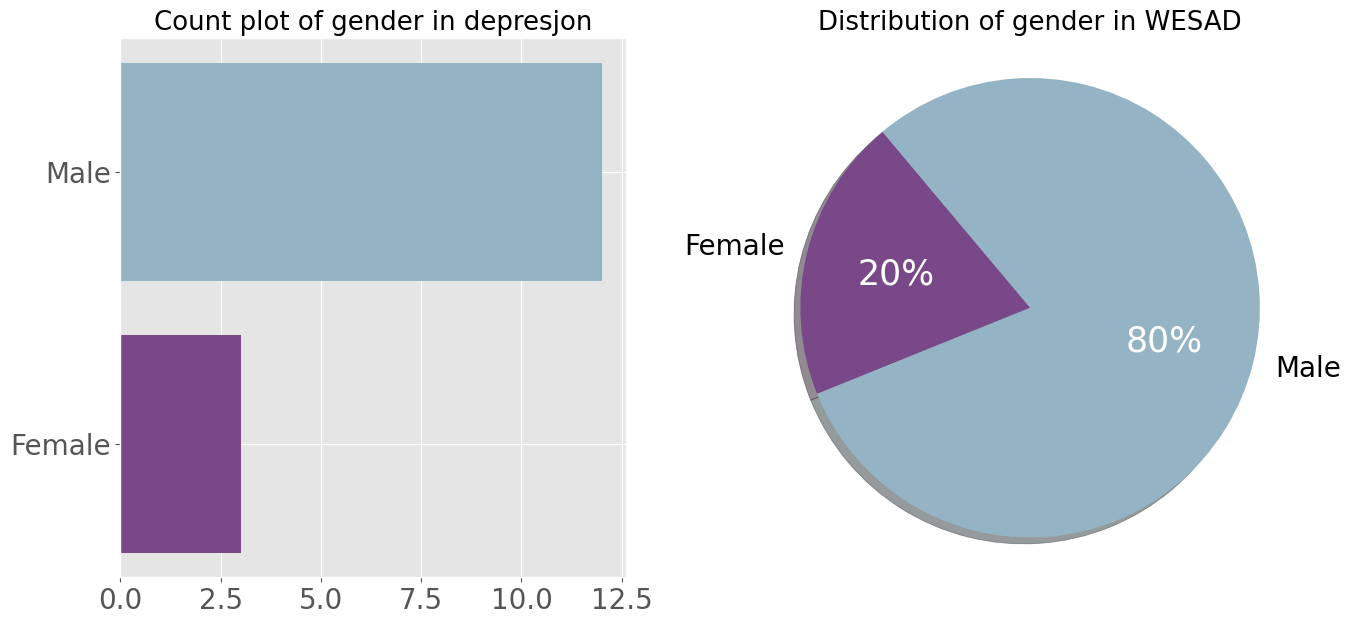

In [86]:
var = 'gender'
target_distribution(y_var=var, data=demo)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


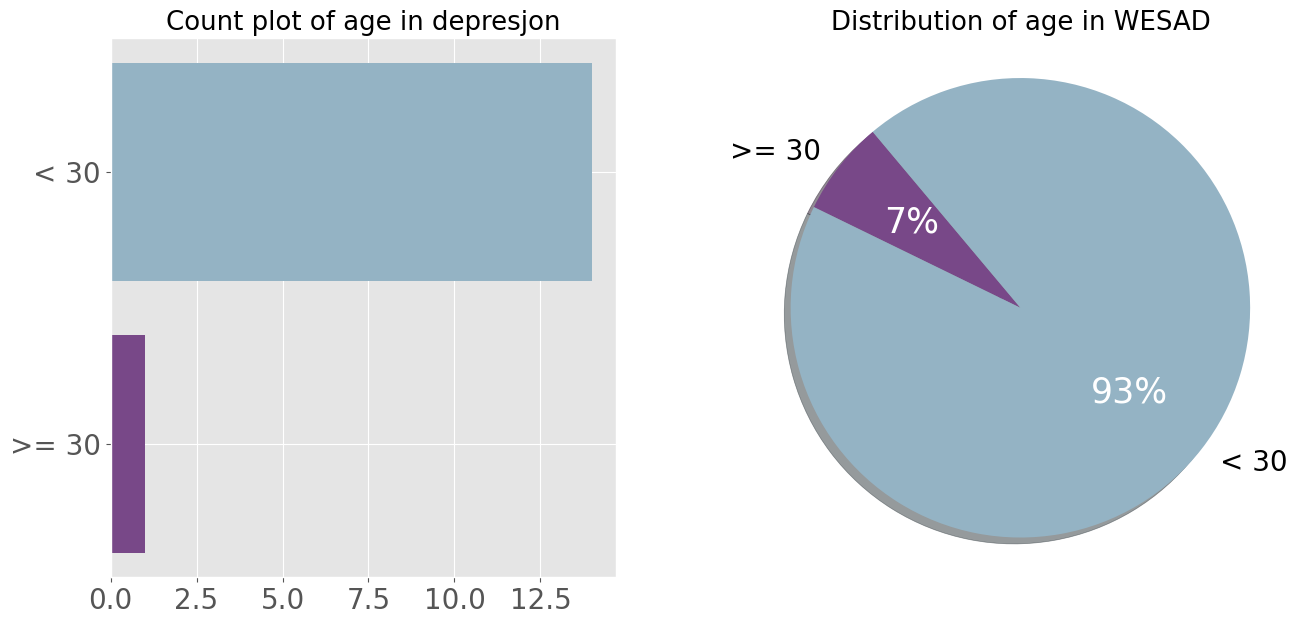

In [87]:
var = 'age'
target_distribution(y_var=var, data=demo)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


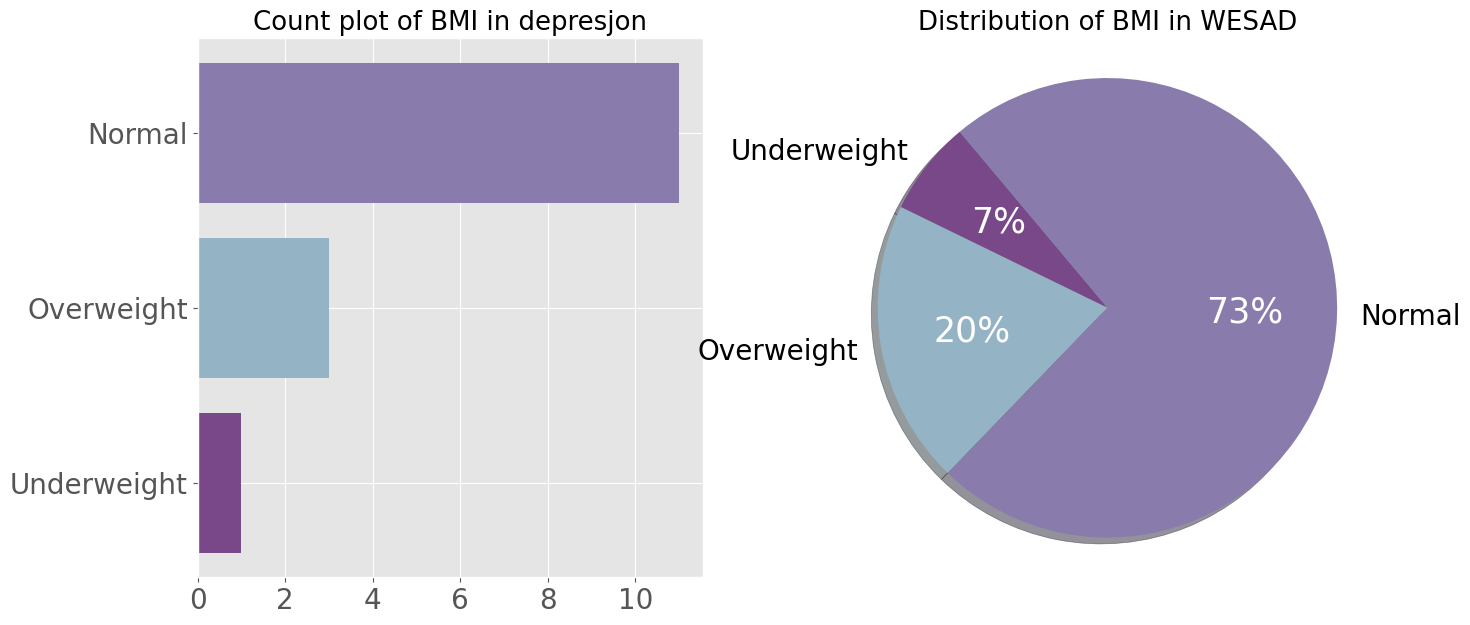

In [88]:
var = 'BMI'
target_distribution(y_var=var, data=demo)

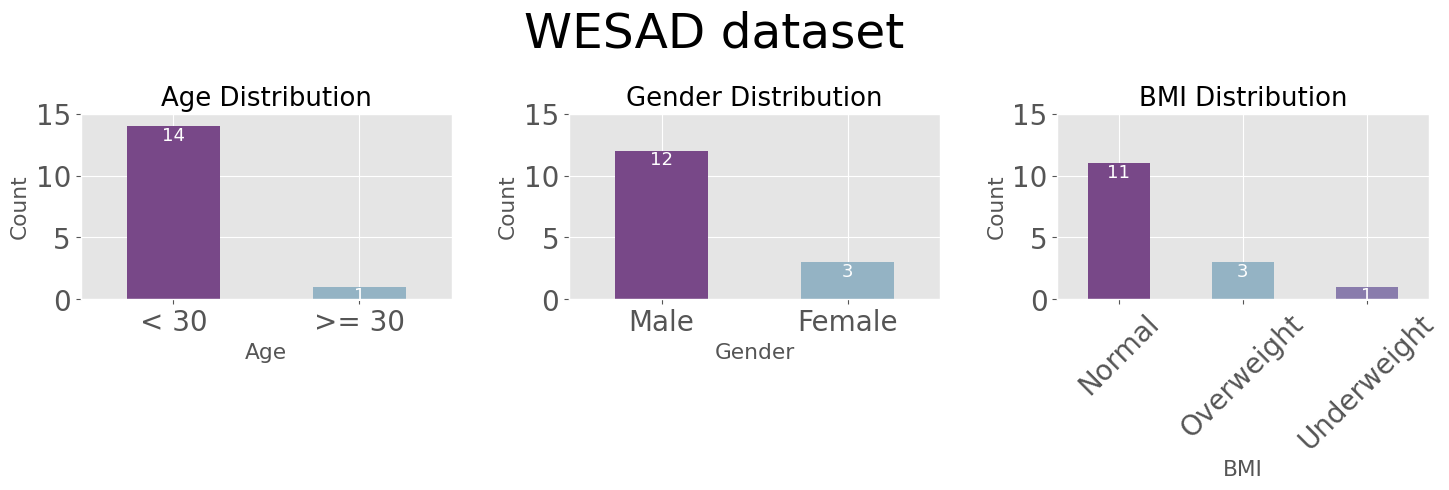

In [89]:
unique_users = demo.drop_duplicates(subset='id')

# Counting unique occurrences for age, gender, and BMI
age_counts = unique_users['age'].value_counts()
gender_counts = unique_users['gender'].value_counts()
bmi_counts = unique_users['BMI'].value_counts()


plt.figure(figsize=(15, 5))

# Function to add labels on top of each bar
def add_labels(ax):
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(f'{int(height)}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, -13),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', color='white')

# Age Plot
ax1 = plt.subplot(1, 3, 1)
age_counts.plot(kind='bar', ax=ax1, color=custom_colors)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.ylim(0, 15)
add_labels(ax1)

# Gender Plot
ax2 = plt.subplot(1, 3, 2)
gender_counts.plot(kind='bar', ax=ax2, color=custom_colors)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.ylim(0, 15)
add_labels(ax2)

# BMI Plot
ax3 = plt.subplot(1, 3, 3)
bmi_counts.plot(kind='bar', ax=ax3, color=custom_colors)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.ylim(0, 15)
add_labels(ax3)

# Add a hypertitle above all plots
plt.suptitle('WESAD dataset', fontsize=35)

plt.tight_layout()
plt.savefig("../visualizations/wesad/demographics_barplots_WESAD.png",bbox_inches='tight')
plt.savefig("../visualizations/wesad/demographics_barplots_WESAD.eps",bbox_inches='tight')
plt.show()

In [90]:
wesad_dataset['id'] = wesad_dataset['id'].astype(str)
demo['id'] = demo['id'].astype(str)

wesad_dataset['id'] = wesad_dataset['id'].astype(int)
demo['id'] = demo['id'].astype(int)

wesad = wesad_dataset.merge(demo, how='left', on='id')
wesad

,id,EDA_0,EDA_1,EDA_2,EDA_3,TEMP_0,TEMP_1,TEMP_2,TEMP_3,ACC1_0,...,BVP_58,BVP_59,BVP_60,BVP_61,BVP_62,BVP_63,stress,gender,BMI,age
0,2,5452.450365,5366.846848,5264.122627,5115.746165,10279.722091,10279.722091,10279.722091,10279.722091,126.326243,...,-137.408002,-128.387507,-111.782506,-91.536409,-71.450360,-54.013997,0.0,Male,Overweight,< 30
1,2,5264.122627,5115.746165,5127.156998,5013.021944,10279.722091,10279.722091,10279.722091,10279.722091,90.734562,...,25.850055,23.818332,23.653838,23.849453,23.195923,21.515416,0.0,Male,Overweight,< 30
2,2,5127.156998,5013.021944,5372.556718,5235.591090,10279.722091,10279.722091,10279.722091,10279.722091,-27.904372,...,31.562887,28.882079,28.415272,27.312718,22.711332,13.432982,0.0,Male,Overweight,< 30
3,2,5372.556718,5235.591090,5184.228979,5155.692989,10279.722091,10279.722091,10464.748540,10464.748540,-27.904372,...,-83.391734,-65.897576,-45.375840,-26.334550,-12.494826,-5.474934,0.0,Male,Overweight,< 30
4,2,5184.228979,5155.692989,5115.746165,5081.504758,10464.748540,10464.748540,10464.748540,10464.748540,-39.768266,...,-2.358440,-2.225067,-2.042790,-1.833838,-1.958320,-2.878597,0.0,Male,Overweight,< 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78761,17,-1141.515991,-1141.515991,-1146.439053,-1141.515991,-11412.917628,-11802.683112,-11802.683112,-11802.683112,57.652528,...,12.233733,11.664393,10.917924,9.918415,8.640562,7.097016,0.0,Female,Normal,< 30
78762,17,-1146.439053,-1141.515991,-1141.515991,-1141.515991,-11802.683112,-11802.683112,-11802.683112,-11802.683112,57.652528,...,-20.092160,-16.562248,-12.918468,-9.186125,-5.339913,-1.519005,0.0,Female,Normal,< 30
78763,17,-1141.515991,-1141.515991,-1136.589079,-1151.365964,-11802.683112,-11802.683112,-11802.683112,-11802.683112,57.652528,...,11.322788,10.753448,10.146151,9.526202,8.868298,8.045917,0.0,Female,Normal,< 30
78764,17,-1136.589079,-1151.365964,-1141.515991,-1141.515991,-11802.683112,-11802.683112,-11802.683112,-11412.917628,57.652528,...,-3.189070,-0.544800,2.213339,4.908218,7.350056,9.450290,0.0,Female,Normal,< 30


In [91]:
wesad.to_pickle("../data/wesad/wesad_dataset_merged.pkl")